
# Project: Analyze A/B Test Results
>   **Project 3 - Ghadah Alabduljabbar**


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.

For this project, we will be working on the results of an A/B test run by an e-commerce website.  Our goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

Import essential libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df[df['converted'] == 1]['user_id'].nunique() / df['user_id'].nunique() * 100

12.104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
x = df[(df['group'] == 'treatment') | (df['landing_page'] == 'new_page')]['user_id'].count()
y = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]['user_id'].count()
x-y

3893

In [7]:
df[(df['group'] == 'treatment') | (df['landing_page'] == 'new_page')]['user_id'].count()

149204

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

There's no missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page, so we will remove all these rows that are not aligned.

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df_1 = df[(df['group'] == 'treatment') & (df['landing_page'] == 'new_page')]
df_2 = df[(df['group'] == 'control') & (df['landing_page'] == 'old_page')]
frames = [df_1, df_2]
df2 = pd.concat(frames)
df2.groupby(['group','landing_page'])[['user_id']].count()

,,user_id
group,landing_page,
control,old_page,145274
treatment,new_page,145311


In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** in the below cells.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates(subset='user_id', keep="last", inplace=True)
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
conv_per = df2.groupby(['converted'])[['user_id']].count()
conv_per.groupby(level=0).apply(lambda x: round(x/float(df2['user_id'].count()),4))

,user_id
converted,
0,0.8804
1,0.1196


The probability of an individual converting regardless of the page they receive is **11.96%**

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
group_conv_per = (df2.groupby(['group','converted'])['user_id'].count()).reset_index(name='count')
group_conv_per

,group,converted,count
0,control,0,127785
1,control,1,17489
2,treatment,0,128046
3,treatment,1,17264


In [17]:
round(group_conv_per.iloc[1,2]/group_conv_per.iloc[0:2,2].sum(),4)

0.1204

The probability of an individual in the **control** group converting is **12.04%**

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
round(group_conv_per.iloc[3,2]/group_conv_per.iloc[2:4,2].sum(),4)

0.1188

The probability of an individual in the **treatment** group converting is **11.88%**

d. What is the probability that an individual received the new page?

In [19]:
newp_per = df2.groupby(['landing_page'])[['user_id']].count()
newp_per.groupby(level=0).apply(lambda x: round(x/float(df2['user_id'].count()),4))

,user_id
landing_page,
new_page,0.5001
old_page,0.4999


The probability of an individual receiving the **new page** is **50.01%**

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Answer:** \
From the results above we can see the conversion rate is so close, the control group has a slightly higher conversion rate of **12.04%** compare to the treatment group **11.88%**, however, I believe there is still no sufficient evidence to say that a specific page leads to more conversions, as we need to know the significance of these results by defining our test hypothesis and calculate the p-value for each page, after that, we will be able to provide useful information for the decision-makers to decide whether to keep the old page or implement the new page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**The null hypothesis $H_0$ and the alternative hypothesis $H_0$ is as follow:**

$$H_0: p_{new} \leq p_{old}$$

$$H_1: p_{new} > p_{old}$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
# we assumed above that both (new and old) are equal to the converted rate in ab_data.csv regardless of the page.
p_new = df2[df2['converted'] == 1]['user_id'].count() / df2['user_id'].nunique()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
# since we assumed they are equal it will be calculated the same way
p_old = df2[df2['converted'] == 1]['user_id'].count() / df2['user_id'].nunique()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [22]:
n_new = df2[df2['landing_page'] == 'new_page']['user_id'].count()
n_new

145310

d. What is $n_{old}$?

In [23]:
n_old = df2[df2['landing_page'] == 'old_page']['user_id'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(n_new,p_new)
new_page_converted

17106

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(n_old,p_old)
old_page_converted

17547

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
(new_page_converted / n_new) - (old_page_converted / n_old)

-0.0030648150836301985

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    old_page_converted = np.random.binomial(n_old,p_old)
    p_diffs.append((new_page_converted / n_new) - (old_page_converted / n_old))

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

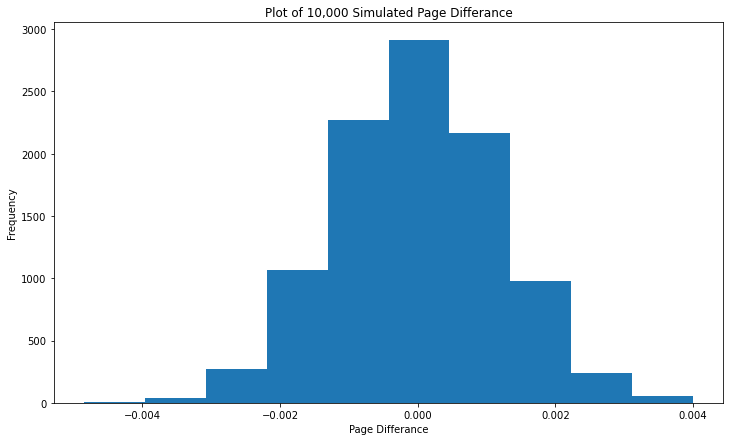

In [28]:
plt.figure(figsize=(12,7))
plt.hist(p_diffs)
plt.xlabel('Page Differance')
plt.ylabel('Frequency')
plt.title('Plot of 10,000 Simulated Page Differance');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# The actual difference observed in ab_data.csv
act_diff = df[df['group'] == 'treatment']['converted'].mean() -  df[df['group'] == 'control']['converted'].mean() 

# The proportion of the p_diffs are greater than the actual difference
p_diffs = np.array(p_diffs)
(p_diffs > act_diff).mean()


0.8933

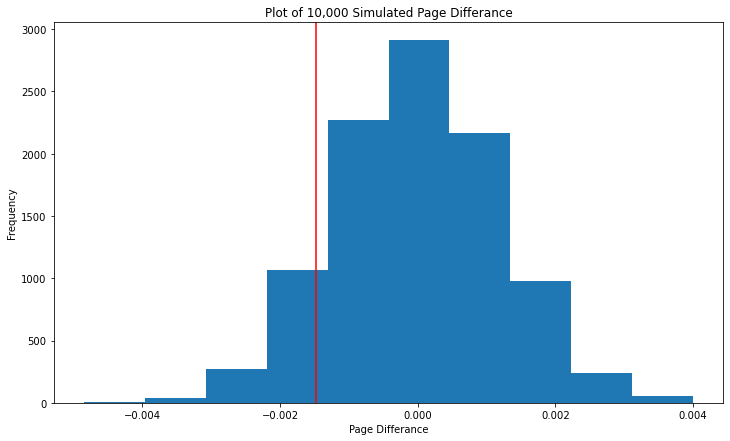

In [30]:
plt.figure(figsize=(12,7))
plt.hist(p_diffs)
plt.axvline(act_diff,c='red')
plt.xlabel('Page Differance')
plt.ylabel('Frequency')
plt.title('Plot of 10,000 Simulated Page Differance');

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:** \
What we computed above is called **p-value** which is the probability of observing our statistics given the null hypothesis is true. The lower the p-value the greater the statistical significance of the observed difference, in this case, the p-value is high enough **0.8933** (Higher than the Type I error rate of 5% (0.05)), so we fail to reject the null hypothesis which stated that the effect of the new page is less than or equal the old page, therefor we advise the decision maker to keep the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)]['user_id'].count()
convert_new = df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)]['user_id'].count()
n_old = df2[df2['landing_page'] == 'old_page']['user_id'].count()
n_new = df2[df2['landing_page'] == 'new_page']['user_id'].count()

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [33]:
from scipy.stats import norm

norm.cdf(z_score) # This value will tell us how significant our z-score is

0.9050583127590245

In [34]:
# For the single-sides test, we assumed at 95% confidence level
norm.ppf(1-(0.05)) # This value will tell us what our critical value at 95% confidence is

1.6448536269514722

**Answer:** \
From the results above we can see z_score value is **1.3109** and it is significant and less than **1.6448**, therefore, we fail to reject the null hypothesis, and that is consistent with the previous results in part **j**.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:** \
Since the result is discrete and we have two outcomes (conversion or no conversion) we will use **Logistic Regression**.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
df2['intercept']=1
df2[['control', 'treatment']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


In [36]:
df2.drop(columns=['control'], inplace=True)
df2.rename(columns={'treatment':'ab_page'}, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
import statsmodels.api as sm

model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:               8.077e-06
Time:                        17:15:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer:** \
The null hypothesis $H_0$ and the alternative hypothesis $H_0$ here is:

$$H_0: p_{new} = p_{old}$$

$$H_1: p_{new} \neq p_{old}$$

The **p-value** associated with ab_page is **0.190**

The reason both are different is that previously we performed a one-tailed test, whereas in the logistic regression we performed a two-tailed test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:** \
I believe considering other factors is a good idea because it might influence the final result in which users convert or not, and that will help decision-makers to make more accurate decisions, other factors like taking user's information such as age and gender into account. As for the disadvantage of adding additional factors/variables is that sometimes adding more can lead to inaccurate conclusions (ex: Simpson's paradox where some effect of different variables will disappear or reverses when they are combined, and appears when they are tested individually), also adding more factors will need more resources (Time & Memory).

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [40]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [41]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [42]:
### Fit Your Linear Model And Obtain the Results
country_model = sm.Logit(df_new['converted'],df_new[['intercept', 'ab_page', 'US', 'UK']])
country_results = country_model.fit()
country_results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:               2.323e-05
Time:                        17:15:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

**Answer:** \
From the result above we can see that there is no significant impact on the convertion based on countries (looking at each factor individually).(p-values are higher than the Type I error rate)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
df_new['US_ab_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_ab_page'] = df_new['UK'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,US_ab_page,UK_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1


In [45]:
### Fit Your Linear Model And Obtain the Results
country_model = sm.Logit(df_new['converted'],df_new[['intercept', 'ab_page', 'US', 'UK','US_ab_page','UK_ab_page']])
country_results = country_model.fit()
country_results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:               3.482e-05
Time:                        17:23:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

**Answer:** \
From the statistics summary above we can see that all of p-values are large enough, higher than the Type I error rate of 5% (0.05), which mean there is no significant impact on the convertion based on pages and countries (looking at the interaction between pages and countries).

<a id='conclusions'></a>
## Conclusions

As a conclusion, from all the work we did in this notebook, we can conclude that we fail to reject the null hypothesis which stated that the effect of the new page is less than or equal to the old page, therefor we advise the decision maker to keep the old page and not lose resources on working on the new page.